* Importing Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , median_absolute_error , r2_score

* Loading dataset

In [2]:
path = "G:\\Data Field\\D..S..Course\\data.sc.Asem\\Data\\Data\\2.9 Ensemble Reg\\houses.csv"
data = pd.read_csv(path)
data

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,22.190
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,53.800
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,18.000
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,60.400
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,51.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,1.00,740,1.0,0,0,3,6,740,0,1953,0,47.5077,-122.344,1170,17.850
995,4,2.50,1860,2.0,0,0,4,7,1860,0,1991,0,47.3492,-122.030,1860,29.100
996,2,2.75,1590,1.5,0,0,3,5,1590,0,1920,0,47.2786,-122.250,1310,19.995
997,2,1.00,850,1.0,0,0,3,7,850,0,1922,0,47.6707,-122.328,1300,55.350


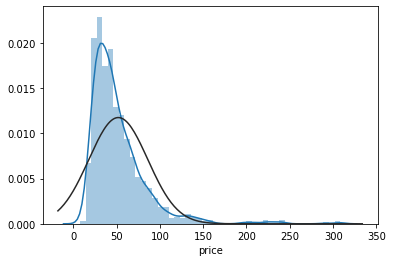

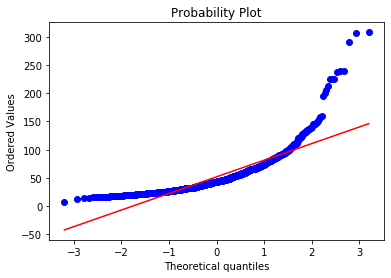

In [3]:
sns.distplot(data["price"]  , fit= norm)
fig = plt.figure()
res = stats.probplot(data["price"] , plot=plt)

In [4]:
data["price"] = np.log(data["price"])

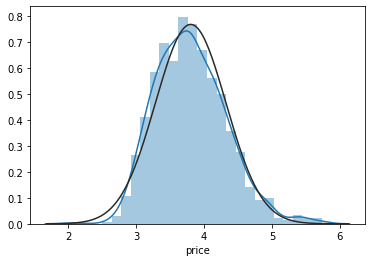

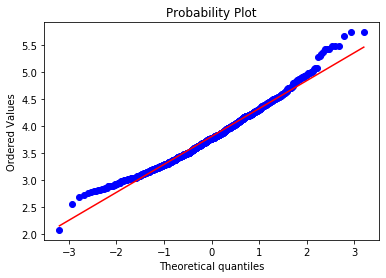

In [5]:
sns.distplot(data["price"]  , fit= norm)
fig = plt.figure()
res = stats.probplot(data["price"] , plot=plt)

In [6]:
data["sqft_living"] = np.log(data["sqft_living"])

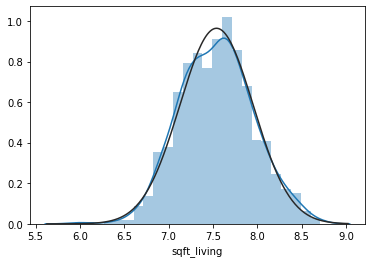

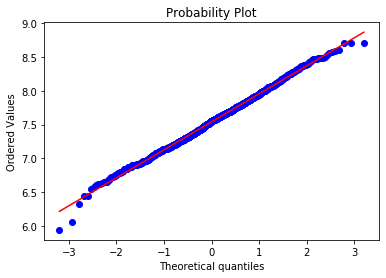

In [7]:
sns.distplot(data["sqft_living"] , fit= norm)
fig= plt.figure()
res = stats.probplot(data["sqft_living"] , plot= plt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


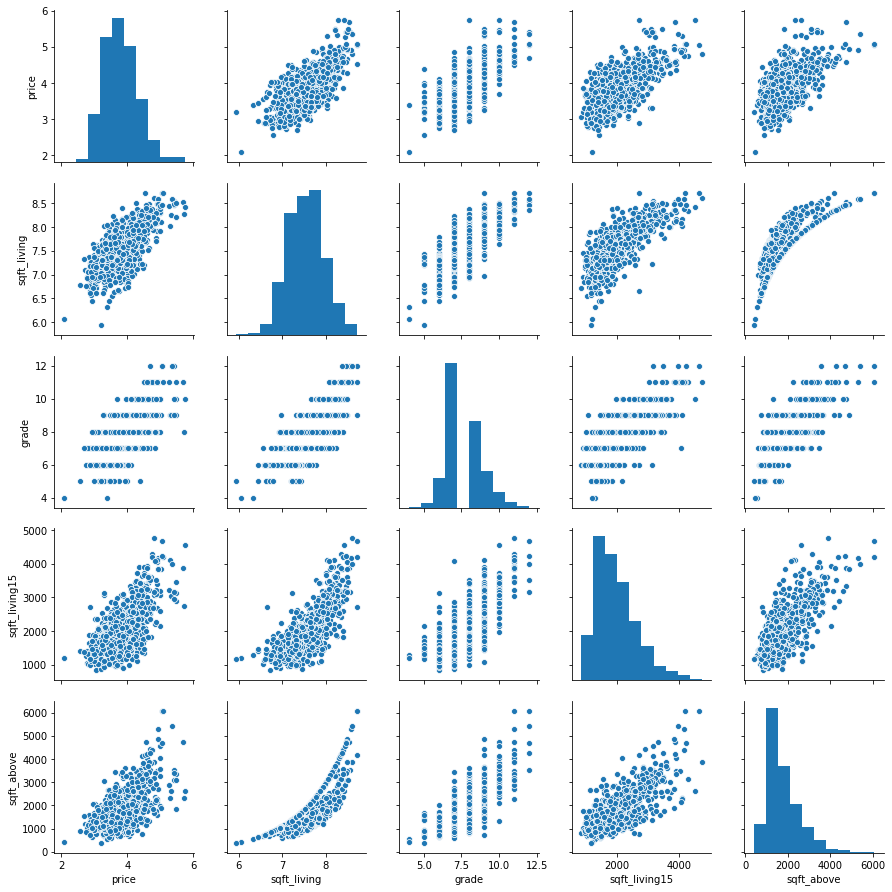

In [8]:
cols = ['price', 'sqft_living', 'grade', 'sqft_living15', 'sqft_above']
sns.pairplot(data[cols] , size=2.5)
plt.show()

In [9]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'price'],
      dtype='object')

In [10]:
data.values

array([[ 3.00000000e+00,  1.00000000e+00,  7.07326972e+00, ...,
        -1.22257000e+02,  1.34000000e+03,  3.09964174e+00],
       [ 3.00000000e+00,  2.25000000e+00,  7.85166118e+00, ...,
        -1.22319000e+02,  1.69000000e+03,  3.98527347e+00],
       [ 2.00000000e+00,  1.00000000e+00,  6.64639051e+00, ...,
        -1.22233000e+02,  2.72000000e+03,  2.89037176e+00],
       ...,
       [ 2.00000000e+00,  2.75000000e+00,  7.37148930e+00, ...,
        -1.22250000e+02,  1.31000000e+03,  2.99548224e+00],
       [ 2.00000000e+00,  1.00000000e+00,  6.74523635e+00, ...,
        -1.22328000e+02,  1.30000000e+03,  4.01367666e+00],
       [ 2.00000000e+00,  1.00000000e+00,  6.93731408e+00, ...,
        -1.22057000e+02,  1.45000000e+03,  2.94417579e+00]])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
bedrooms         999 non-null int64
bathrooms        999 non-null float64
sqft_living      999 non-null float64
floors           999 non-null float64
waterfront       999 non-null int64
view             999 non-null int64
condition        999 non-null int64
grade            999 non-null int64
sqft_above       999 non-null int64
sqft_basement    999 non-null int64
yr_built         999 non-null int64
yr_renovated     999 non-null int64
lat              999 non-null float64
long             999 non-null float64
sqft_living15    999 non-null int64
price            999 non-null float64
dtypes: float64(6), int64(10)
memory usage: 125.0 KB


In [12]:
data.describe()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.349349,2.045796,7.540295,1.446947,0.008008,0.237237,3.464464,7.605606,1750.233233,301.164164,1969.030030,81.830831,47.549720,-122.207406,1986.813814,3.804968
std,0.852367,0.721983,0.414033,0.517420,0.089173,0.765472,0.689521,1.160734,790.466905,451.023402,28.198607,395.767918,0.141558,0.139564,670.723475,0.519137
min,0.000000,0.000000,5.940171,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1900.000000,0.000000,47.177500,-122.490000,830.000000,2.079442
25%,3.000000,1.500000,7.247786,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,47.443000,-122.322500,1490.000000,3.433342
50%,3.000000,2.000000,7.549609,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,47.563600,-122.218000,1850.000000,3.772761
75%,4.000000,2.500000,7.813994,2.000000,0.000000,0.000000,4.000000,8.000000,2135.000000,580.000000,1992.000000,0.000000,47.673400,-122.118000,2360.000000,4.150190
max,7.000000,5.000000,8.711114,3.500000,1.000000,4.000000,5.000000,12.000000,6070.000000,2060.000000,2015.000000,2014.000000,47.777600,-121.709000,4760.000000,5.730100


In [13]:
data.skew()

bedrooms          0.354236
bathrooms         0.308664
sqft_living       0.036568
floors            0.686188
waterfront       11.056675
view              3.329668
condition         0.835348
grade             0.830892
sqft_above        1.479036
sqft_basement     1.471452
yr_built         -0.544767
yr_renovated      4.634440
lat              -0.358193
long              0.734047
sqft_living15     1.049913
price             0.505188
dtype: float64

In [14]:
Corelation =  data.corr()
Corelation

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
bedrooms,1.000000,0.482798,0.607624,0.185199,-0.050026,0.032564,0.056094,0.380440,0.473182,0.272198,0.130048,0.045829,-0.002473,0.117745,0.405484,0.339876
bathrooms,0.482798,1.000000,0.740540,0.465510,0.064334,0.149843,-0.079503,0.664543,0.655316,0.274319,0.501625,0.034624,0.043276,0.272425,0.617032,0.514206
sqft_living,0.607624,0.740540,1.000000,0.373638,0.070372,0.256820,0.025782,0.753172,0.823246,0.450424,0.322503,0.038850,0.102991,0.236133,0.780247,0.675849
floors,0.185199,0.465510,0.373638,1.000000,-0.012500,-0.013728,-0.201886,0.422261,0.550499,-0.272861,0.398802,0.031372,0.086412,0.162511,0.289369,0.304209
waterfront,-0.050026,0.064334,0.070372,-0.012500,1.000000,0.397841,0.053522,0.078947,0.058085,0.098874,-0.013246,0.037573,-0.026438,-0.061491,0.112337,0.190750
view,0.032564,0.149843,0.256820,-0.013728,0.397841,1.000000,0.089078,0.235101,0.144443,0.328337,-0.039324,0.041248,0.031193,-0.094165,0.317280,0.363847
condition,0.056094,-0.079503,0.025782,-0.201886,0.053522,0.089078,1.000000,-0.061347,-0.086372,0.163470,-0.317137,-0.074066,-0.060439,-0.158939,-0.046798,0.074440
grade,0.380440,0.664543,0.753172,0.422261,0.078947,0.235101,-0.061347,1.000000,0.754809,0.205613,0.431182,0.001580,0.140159,0.215286,0.744724,0.673359
sqft_above,0.473182,0.655316,0.823246,0.550499,0.058085,0.144443,-0.086372,0.754809,1.000000,-0.054825,0.390261,0.024989,0.059706,0.340541,0.763250,0.589604
sqft_basement,0.272198,0.274319,0.450424,-0.272861,0.098874,0.328337,0.163470,0.205613,-0.054825,1.000000,-0.103466,0.057344,0.148260,-0.147994,0.252128,0.351378


* strong Corelation_feartures

In [15]:
k = 5
features = Corelation.nlargest(k , "price" )["price"].index
features

Index(['price', 'sqft_living', 'grade', 'sqft_living15', 'sqft_above'], dtype='object')

* Strong Coreelation values 

In [16]:
S_C_M = np.corrcoef(data[features].values.T)
S_C_M

array([[1.        , 0.6758494 , 0.67335924, 0.65386303, 0.58960364],
       [0.6758494 , 1.        , 0.75317191, 0.7802471 , 0.82324621],
       [0.67335924, 0.75317191, 1.        , 0.74472419, 0.75480936],
       [0.65386303, 0.7802471 , 0.74472419, 1.        , 0.76324966],
       [0.58960364, 0.82324621, 0.75480936, 0.76324966, 1.        ]])

* present heatmap correlation


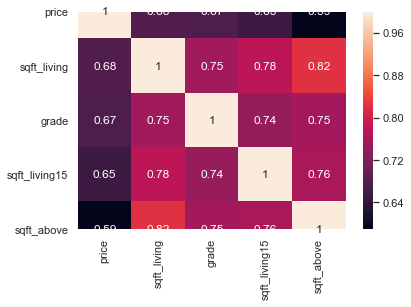

In [17]:
sns.set(font_scale=1)
f , ax = plt.subplots()
fig = sns.heatmap(S_C_M , annot= True , xticklabels = features.values , yticklabels=features.values)

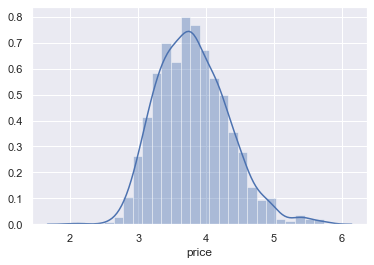

In [18]:
sns.distplot(data["price"])

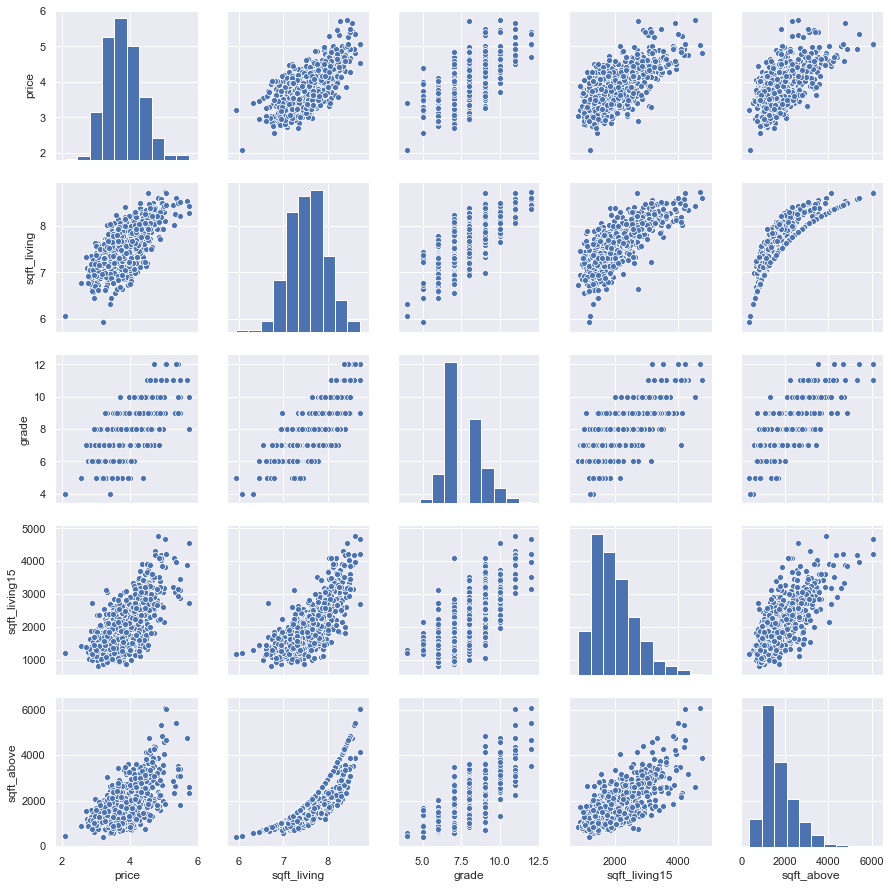

In [19]:
cols = ['price', 'sqft_living', 'grade', 'sqft_living15', 'sqft_above']
sns.pairplot(data[cols] , size=2.5)
plt.show()

* Spliting data into input and output data

In [20]:
X = data.iloc[ : , : -1]
y = data.iloc[ : , -1]

In [21]:
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15
0,3,1.00,7.073270,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340
1,3,2.25,7.851661,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690
2,2,1.00,6.646391,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720
3,4,3.00,7.580700,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360
4,3,2.00,7.426549,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,1.00,6.606650,1.0,0,0,3,6,740,0,1953,0,47.5077,-122.344,1170
995,4,2.50,7.528332,2.0,0,0,4,7,1860,0,1991,0,47.3492,-122.030,1860
996,2,2.75,7.371489,1.5,0,0,3,5,1590,0,1920,0,47.2786,-122.250,1310
997,2,1.00,6.745236,1.0,0,0,3,7,850,0,1922,0,47.6707,-122.328,1300


In [22]:
y

0      3.099642
1      3.985273
2      2.890372
3      4.100989
4      3.931826
         ...   
994    2.882004
995    3.370738
996    2.995482
997    4.013677
998    2.944176
Name: price, Length: 999, dtype: float64

In [23]:
X = data.iloc[ : , : -1].values
y = data.iloc[ : , -1].values

In [24]:
X

array([[ 3.00000000e+00,  1.00000000e+00,  7.07326972e+00, ...,
         4.75112000e+01, -1.22257000e+02,  1.34000000e+03],
       [ 3.00000000e+00,  2.25000000e+00,  7.85166118e+00, ...,
         4.77210000e+01, -1.22319000e+02,  1.69000000e+03],
       [ 2.00000000e+00,  1.00000000e+00,  6.64639051e+00, ...,
         4.77379000e+01, -1.22233000e+02,  2.72000000e+03],
       ...,
       [ 2.00000000e+00,  2.75000000e+00,  7.37148930e+00, ...,
         4.72786000e+01, -1.22250000e+02,  1.31000000e+03],
       [ 2.00000000e+00,  1.00000000e+00,  6.74523635e+00, ...,
         4.76707000e+01, -1.22328000e+02,  1.30000000e+03],
       [ 2.00000000e+00,  1.00000000e+00,  6.93731408e+00, ...,
         4.73738000e+01, -1.22057000e+02,  1.45000000e+03]])

In [25]:
y

array([3.09964174, 3.98527347, 2.89037176, 4.1009891 , 3.93182563,
       4.81218436, 3.24843463, 3.37365488, 3.13331794, 3.47506723,
       4.19343546, 3.8458832 , 3.4339872 , 3.68887945, 3.97029191,
       4.17438727, 3.67630067, 3.8815638 , 2.93916192, 3.13549422,
       3.65065824, 5.29831737, 3.34990409, 3.22961792, 3.49347266,
       3.14845336, 4.54009819, 4.20020495, 3.77963382, 4.27527626,
       4.06130471, 3.33220451, 4.23047674, 3.97968165, 3.47351804,
       4.24276457, 4.00733319, 4.15888308, 3.17805383, 4.10264337,
       4.13516656, 4.35027794, 4.45665858, 4.22683375, 3.43075618,
       3.88773031, 3.04685305, 4.36309862, 3.80666249, 4.90527478,
       3.12676054, 3.54095932, 4.09434456, 4.06902675, 4.52178858,
       4.48300255, 3.37587957, 3.40452517, 4.55492897, 3.76120012,
       4.17438727, 3.3638416 , 3.92197334, 4.00551335, 3.74950408,
       3.45828635, 4.57985238, 3.35689712, 3.0155349 , 4.89034913,
       4.6443909 , 3.48124009, 4.04480412, 3.58351894, 3.55248

* Handling Missing data

In [26]:
Fill_Missing_data =SimpleImputer( missing_values=np.nan  , strategy= "mean")
data = Fill_Missing_data.fit_transform(data)
data

array([[ 3.00000000e+00,  1.00000000e+00,  7.07326972e+00, ...,
        -1.22257000e+02,  1.34000000e+03,  3.09964174e+00],
       [ 3.00000000e+00,  2.25000000e+00,  7.85166118e+00, ...,
        -1.22319000e+02,  1.69000000e+03,  3.98527347e+00],
       [ 2.00000000e+00,  1.00000000e+00,  6.64639051e+00, ...,
        -1.22233000e+02,  2.72000000e+03,  2.89037176e+00],
       ...,
       [ 2.00000000e+00,  2.75000000e+00,  7.37148930e+00, ...,
        -1.22250000e+02,  1.31000000e+03,  2.99548224e+00],
       [ 2.00000000e+00,  1.00000000e+00,  6.74523635e+00, ...,
        -1.22328000e+02,  1.30000000e+03,  4.01367666e+00],
       [ 2.00000000e+00,  1.00000000e+00,  6.93731408e+00, ...,
        -1.22057000e+02,  1.45000000e+03,  2.94417579e+00]])

* Spliting dataset into Training and Testing data

In [27]:
X_train , X_test , y_train ,y_test = train_test_split( X , y , test_size = 0.33 , random_state = 44 , shuffle = True)


* Applyng Random_Forest_Regressor

In [28]:
for i in range(50 , 500 , 50) :
    Random_Forest_reg = RandomForestRegressor(n_estimators=i , random_state =44 , max_depth =10)
    Random_Forest_reg.fit(X_train , y_train)
    Model_Train_Score = Random_Forest_reg.score( X_train , y_train)
    Model_Test_Score = Random_Forest_reg.score( X_test , y_test)
    Model_Fetures = Random_Forest_reg.n_features_
    y_pred = Random_Forest_reg.predict(X_test)

    # Computing Model Accuracy

    MAE = mean_absolute_error( y_test , y_pred , multioutput="uniform_average")
    MSE = mean_squared_error(y_test , y_pred, multioutput="uniform_average")
    Mid_A_E = median_absolute_error(y_test , y_pred)
    R2_Score = r2_score(y_test , y_pred)

    print(f"The Estimator_Value :: {i}\n=====\
    The Model_Train_Score :: {Model_Train_Score}\n======\nThe Model_Test_Score ::\
    {Model_Test_Score}\n======\nThe Model_Fetures :: {Model_Fetures}\n======\nThe MAE :: {MAE}\n======\n\
The MSE :: {MSE}\n======\nThe Mid_A_E :: {Mid_A_E}\n=======\nThe R2_Score :: {R2_Score}\n*********************************\n")

The Estimator_Value :: 50
=====    The Model_Train_Score :: 0.968906429423959
The Model_Test_Score ::    0.8139903547491916
The Model_Fetures :: 15
The MAE :: 0.1644434492423681
The MSE :: 0.05107673450044416
The Mid_A_E :: 0.12020546961387102
The R2_Score :: 0.8139903547491916
*********************************

The Estimator_Value :: 100
=====    The Model_Train_Score :: 0.9689457638379243
The Model_Test_Score ::    0.8176155730808159
The Model_Fetures :: 15
The MAE :: 0.1619175208012925
The MSE :: 0.050081279055212535
The Mid_A_E :: 0.12077111105429483
The R2_Score :: 0.8176155730808159
*********************************

The Estimator_Value :: 150
=====    The Model_Train_Score :: 0.9688250232869845
The Model_Test_Score ::    0.8189885482901312
The Model_Fetures :: 15
The MAE :: 0.16161875842950504
The MSE :: 0.04970427123850852
The Mid_A_E :: 0.11711695545343637
The R2_Score :: 0.8189885482901313
*********************************

The Estimator_Value :: 200
=====    The Model_Train_